In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading/Reading the data
df = pd.read_csv('calories_consumed.csv')
df.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [3]:
df.columns

Index(['Weight gained (grams)', 'Calories Consumed'], dtype='object')

(array([6., 2., 2., 0., 0., 1., 1., 0., 1., 1.]),
 array([  62. ,  165.8,  269.6,  373.4,  477.2,  581. ,  684.8,  788.6,
         892.4,  996.2, 1100. ]),
 <a list of 10 Patch objects>)

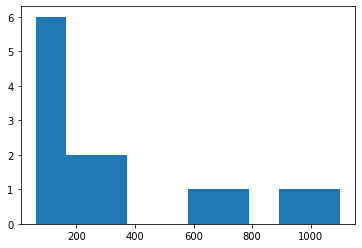

In [8]:
plt.hist(df['Weight gained (grams)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2af3050f98>,
 'caps': [<matplotlib.lines.Line2D at 0x2af305f978>,
 'boxes': [<matplotlib.lines.Line2D at 0x2af3050e48>],
 'medians': [<matplotlib.lines.Line2D at 0x2af305fda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2af306b390>],
 'means': []}

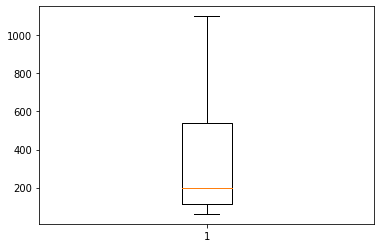

In [7]:
plt.boxplot(df['Weight gained (grams)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2af2c0f400>,
 'caps': [<matplotlib.lines.Line2D at 0x2af2c0fb00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2af2bfef98>],
 'medians': [<matplotlib.lines.Line2D at 0x2af2c0ff28>],
 'fliers': [<matplotlib.lines.Line2D at 0x2af2ff8518>],
 'means': []}

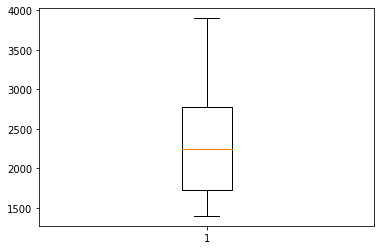

In [6]:
plt.boxplot(df['Calories Consumed'])

(array([3., 1., 2., 2., 1., 2., 1., 0., 1., 1.]),
 array([1400., 1650., 1900., 2150., 2400., 2650., 2900., 3150., 3400.,
        3650., 3900.]),
 <a list of 10 Patch objects>)

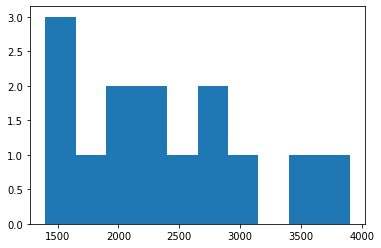

In [5]:
plt.hist(df['Calories Consumed'])

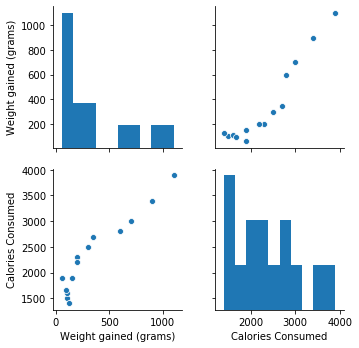

In [6]:
sns.pairplot(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
Weight gained (grams)    14 non-null int64
Calories Consumed        14 non-null int64
dtypes: int64(2)
memory usage: 304.0 bytes


In [8]:
df.describe()

,Weight gained (grams),Calories Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


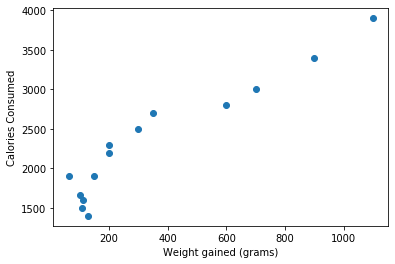

In [11]:
plt.xlabel('Weight gained (grams)')
plt.ylabel('Calories Consumed')
plt.scatter(df['Weight gained (grams)'],df['Calories Consumed'])

In [12]:
# correlation between the two values
df['Calories Consumed'].corr(df['Weight gained (grams)'])

0.9469910088554458

In [ ]:
#Linear regression using stats model

In [23]:
#using 1st method
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [28]:
model = sm.OLS(df['Calories Consumed'],df['Weight gained (grams)'], data = df).fit()
model.params

Weight gained (grams)    4.573028
dtype: float64

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Calories Consumed   R-squared (uncentered):                   0.806
Model:                            OLS   Adj. R-squared (uncentered):              0.791
Method:                 Least Squares   F-statistic:                              53.95
Date:                Thu, 23 Apr 2020   Prob (F-statistic):                    5.63e-06
Time:                        17:32:20   Log-Likelihood:                         -117.65
No. Observations:                  14   AIC:                                      237.3
Df Residuals:                      13   BIC:                                      237.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Weight gained (grams)     4.5730      0.623      7.345      0.000       3.228       5.918
==============================================================================
Omnibus:                        4.256   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                2.767
Skew:                          -1.084   Prob(JB):                        0.251
Kurtosis:                       2.793   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#95% confidence interval
model.conf_int(0.05)

,0,1
Weight gained (grams),3.227929,5.918126


In [34]:
pred = model.predict(df.iloc[:,0])
pred

0      493.886987
1      914.605532
2     4115.724892
3      914.605532
4     1371.908297
5      503.033042
6      585.347540
7      283.527715
8     2743.816595
9     5030.330424
10     457.302766
11     685.954149
12    1600.559680
13    3201.119361
dtype: float64

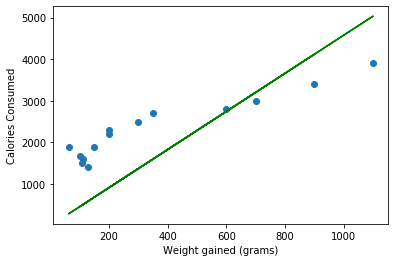

In [35]:
plt.xlabel('Weight gained (grams)')
plt.ylabel('Calories Consumed')
plt.scatter(df['Weight gained (grams)'],df['Calories Consumed'])
plt.plot(df['Weight gained (grams)'], pred, color='green')
plt.show()

In [13]:
# Using second method sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [14]:
df.head(2)

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300


In [15]:
reg = LinearRegression()
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
reg.fit(df[['Weight gained (grams)']],df['Calories Consumed'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
reg.predict(df[['Weight gained (grams)']])
r_pred

array([1807.71838145, 2004.08529355, 3498.18136386, 2004.08529355,
       2217.52758931, 1811.98722736, 1850.4068406 , 1709.5349254 ,
       2857.85447658, 3925.06595537, 1790.64299779, 1897.36414567,
       2324.24873718, 3071.29677234])

In [48]:
reg.coef_

array([2.13442296])

In [49]:
reg.intercept_

1577.2007020291894

In [39]:
from sklearn.metrics import r2_score

In [51]:
acc = r2_score(df['Calories Consumed'],r_pred)
acc

0.8967919708530552

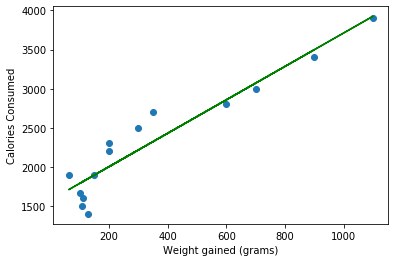

In [52]:
plt.xlabel('Weight gained (grams)')
plt.ylabel('Calories Consumed')
plt.scatter(df['Weight gained (grams)'],df['Calories Consumed'])
plt.plot(df['Weight gained (grams)'], r_pred, color='green')
plt.show()